#Problem Statement:


Insurance Forecast by using Regression Algorithms
Health insurance is a type of insurance that covers medical expenses that arise due to an
illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor
consultation fees. The main purpose of medical insurance is to receive the best medical care without
any strain on your finances. Health insurance plans offer protection against high medical costs. It
covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance
charges, besides many others. Based on certain input features such as age , bmi,,no of
dependents ,smoker ,region medical insurance is calculated .

Columns


• age: age of primary beneficiary

• sex: insurance contractor gender, female, male

• bmi: Body mass index, providing an understanding of body, weights that
are relatively high or low relative to height, objective index of body weight
(kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

• children: Number of children covered by health insurance / Number of
dependents

• smoker: Smoking

• region: the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.

• charges: Individual medical costs billed by health insurance

#we have to predict the charges

In [828]:
#importing libraries

In [829]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [830]:
#importing the medical_cost_insurance dataset

In [831]:
df=pd.read_csv('/content/drive/MyDrive/Data science /medical_cost_insurance.csv')

In [832]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [833]:
#describing our dataset

#Features are:
*age

*sex

*bmi

*children

*smoker

*region

#Label is:

charges




In [834]:
df.shape

(1338, 7)

In [835]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Observations

*No null-values.

*sex,smoker and region are float type we have to convert it into integer type.

*Our target data points are continuous.so we have to use regression algorithms here.



In [837]:
#Data preprocessing
#performing Encoding in the columns smokers and region.


In [838]:
from sklearn.preprocessing import LabelEncoder

In [839]:
from sklearn.compose import make_column_transformer

In [840]:
le=LabelEncoder()

In [841]:
df1=le.fit_transform(df['smoker'])

In [842]:
pd.Series(df1)

,0
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [843]:
df['smoker']=df1

In [844]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [845]:
df2=le.fit_transform(df['region'])

In [846]:
pd.Series(df2)

,0
0,3
1,2
2,2
3,1
4,1
...,...
1333,1
1334,0
1335,2
1336,3


In [847]:
df['region']=df2

In [848]:
df3=le.fit_transform(df['sex'])

In [849]:
pd.Series(df3)

,0
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [850]:
df['sex']=df3

In [851]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [852]:
#EDA-Exploratory Data Analysis

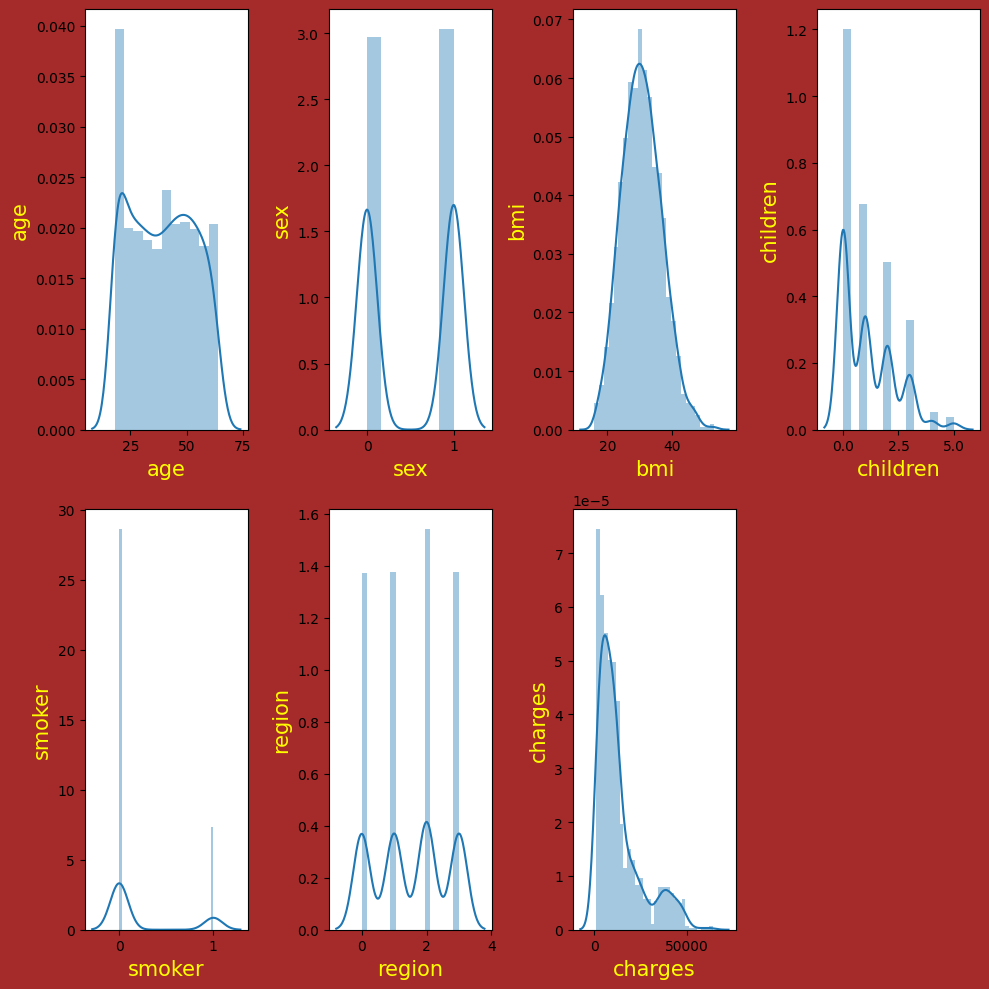

In [853]:
plt.figure(figsize=(10,10),facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=8:
        axs=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15,color='yellow')
        plt.ylabel(column,fontsize=15,color='yellow')
    plotnumber +=1
plt.tight_layout()
plt.show()

In [854]:
# our data have some skewness.
#we can check if there are any outlier in our data by using emperical rule.

In [855]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [856]:
from scipy.stats import zscore


z_score=zscore(df[['age','sex','bmi','children','smoker','region']])
abs_z_score=np.abs(z_score)#apply the formula and you get the scaled data
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,39.283435,0.503040,30.615186,1.043313,0.206687,1.506839,13326.893704
std,14.076955,0.500181,5.985924,1.124403,0.405083,1.104756,12152.973551
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4719.193925
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9412.962500
75%,51.000000,1.000000,34.618750,2.000000,0.000000,2.000000,16924.528350
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,63770.428010


In [857]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [858]:
#check how much skewness removed

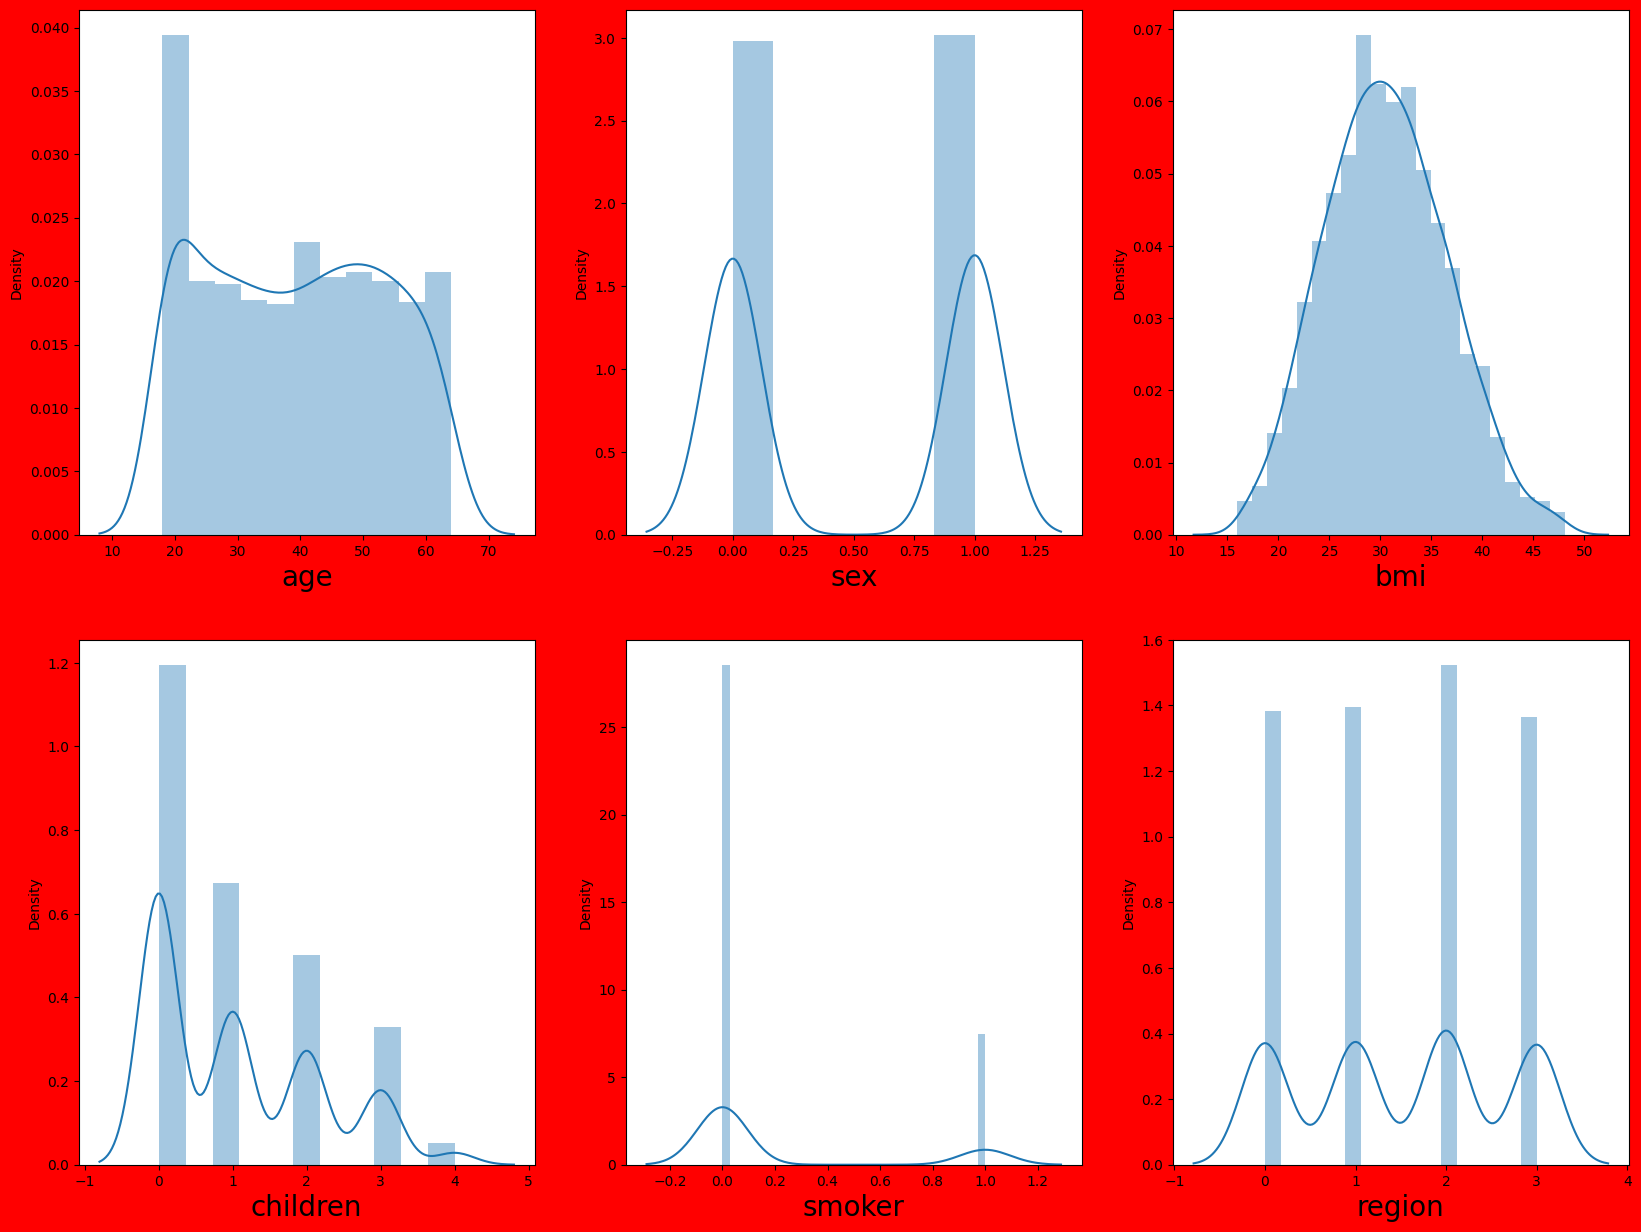

In [859]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in df[['age','sex','bmi','children','smoker','region']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [860]:
#The skewness is reduced than before while comparing with previous plot.
#Our data look muchmore better than before.

In [861]:
#visualizing the relation between features and label using strip plot.

In [862]:
x=df.drop(columns=['charges'],axis=1)

y=df['charges']

In [863]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [864]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


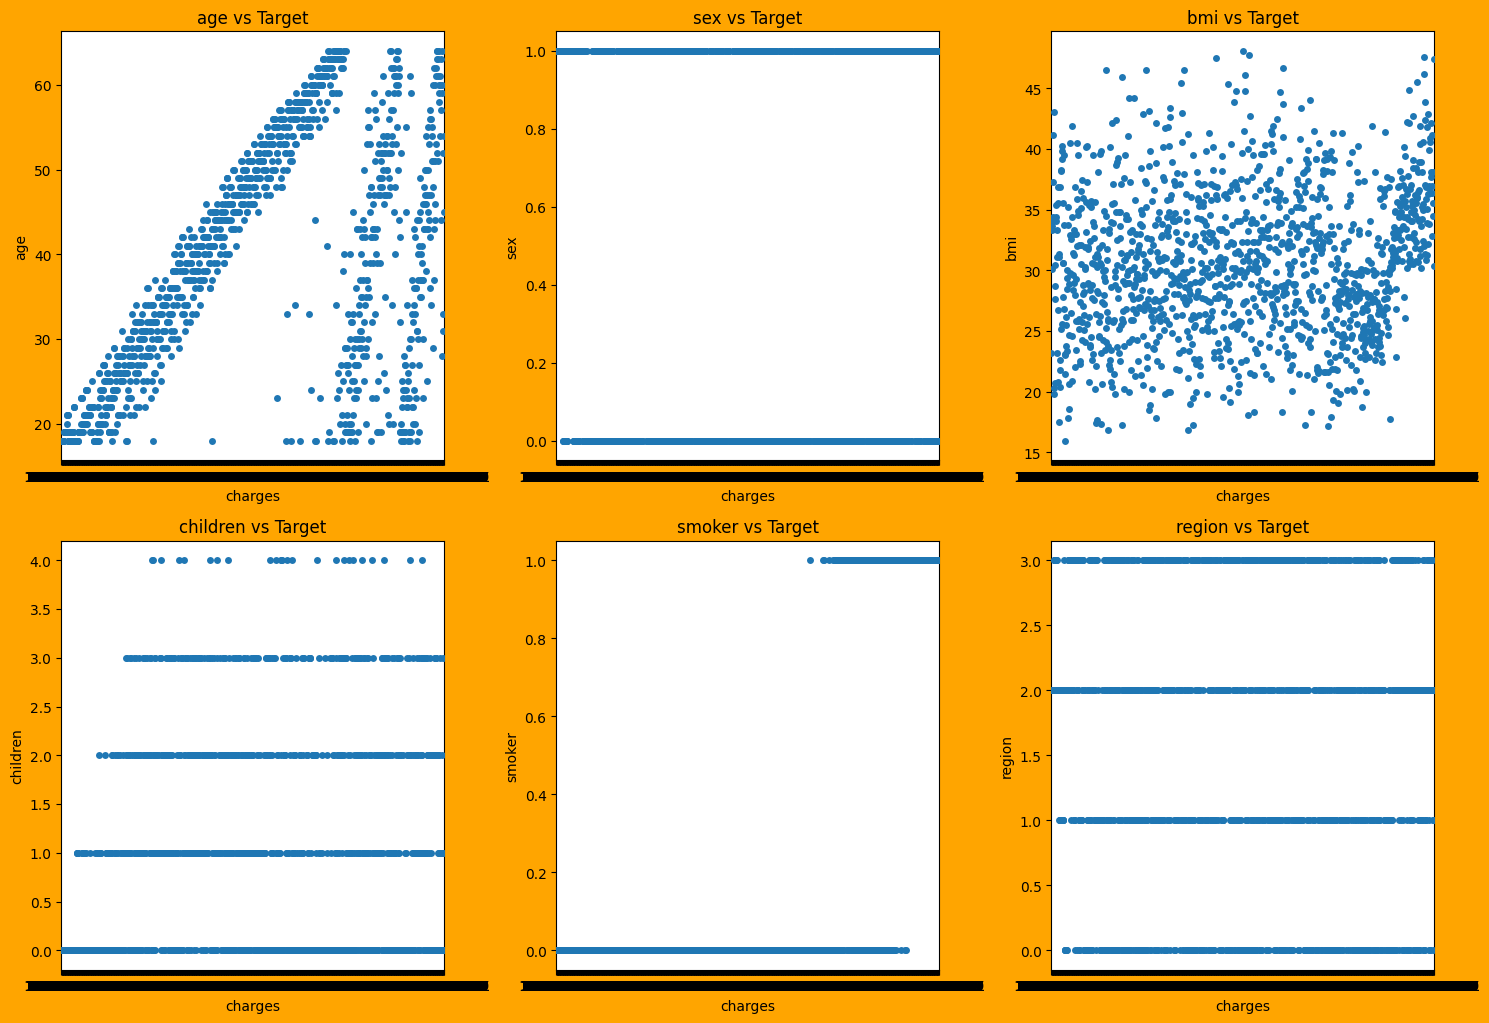

In [865]:
# Assuming 'x' is your features DataFrame and 'y' is your target class
plt.figure(figsize=(15,15),facecolor='orange')
plotnumber = 1
for column in x.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax)
        ax.set_title(f'{column} vs Target')
    plotnumber += 1
plt.tight_layout()
plt.show()

In [866]:
# Now we can check the multicolinearity using vif

In [867]:
#Now use standard scaler and standardized the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [868]:
x_scaled.shape

(1316, 6)

In [869]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [870]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [871]:
vif

,vif,Features
0,1.018969,age
1,1.008550,sex
2,1.043397,bmi
3,1.004829,children
4,1.007649,smoker
5,1.026415,region


In [872]:
#All VIF score are less than 5.So no multicolinearity exist.

In [873]:
#we can select x and y variables

In [874]:
x=df.drop(columns=['charges'],axis=1)

y=df['charges']

In [875]:
# we can select the algorihm-Linear Regression

In [876]:
from sklearn.linear_model import LinearRegression

In [877]:
lm=LinearRegression()

In [878]:
lm.fit(x,y)

LinearRegression()

In [879]:
#we can choose  intercept and coefficient

In [880]:
#Print Intercept and coefficients
#Correlation coefficient [-1 to +1]
print("Intercept: -- > ", lm.intercept_)
print("age: --> ",lm.coef_[0]) # This Much
print("sex : --> ",lm.coef_[1])
print("bmi : --> ",lm.coef_[2])
print("children: --> ",lm.coef_[0]) # This Much
print("smoker: --> ",lm.coef_[1])
print("region : --> ",lm.coef_[2])

Intercept: -- >  -12054.891043436723
age: -->  256.58647934627294
sex : -->  -139.81456792507782
bmi : -->  340.4830873409503
children: -->  256.58647934627294
smoker: -->  -139.81456792507782
region : -->  340.4830873409503


In [881]:
#here sex and smoker have negative values  not much contributing to the charges

In [882]:
#splitting the data into training and splitting

In [883]:
from sklearn.model_selection import train_test_split

In [884]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [885]:
lm.fit(x_train,y_train)

LinearRegression()

In [886]:
lm_y_pred=lm.predict(x_test)

In [887]:
lm_y_pred

array([ 1.12422272e+04,  3.18389099e+03,  2.71905833e+04,  2.97475979e+03,
        9.01090371e+03,  1.17861061e+04,  8.73877301e+03,  2.54996350e+03,
        7.45798933e+03,  3.83730899e+03,  5.61787789e+03,  1.26783825e+04,
        1.13279083e+04,  1.20280877e+04,  1.25171111e+04,  1.26663530e+04,
        5.40677222e+03,  1.32501140e+04,  2.44610886e+04,  4.17759603e+03,
        5.38496116e+03,  5.49444641e+03,  3.26716995e+04,  1.34900571e+04,
        1.59058274e+04,  1.24651894e+04,  8.14887436e+03,  5.39938402e+03,
        1.16206132e+04,  1.21489508e+04,  1.42731713e+04,  1.03732319e+04,
        1.94629465e+03,  1.09179889e+04,  8.97016747e+03,  2.56196928e+03,
        8.57074784e+03,  1.42948393e+04,  4.28401414e+03,  3.78538721e+03,
        3.84779134e+04,  4.25812789e+03,  7.64866428e+03,  1.64882157e+04,
        3.82389561e+04,  1.52729730e+04,  5.05405711e+03,  1.13415441e+04,
        1.23349909e+04,  1.50191877e+04, -7.65586320e+01,  4.46040487e+03,
        1.04782351e+04,  

In [888]:
x_graph=lm.predict(x_test)

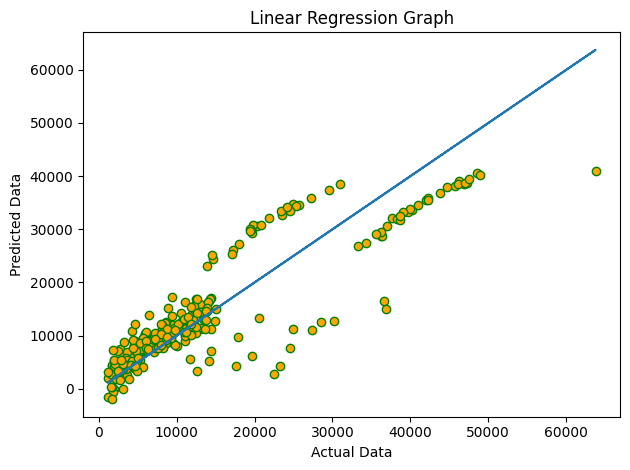

In [889]:
plt.scatter(y_test,x_graph,color='green',facecolor='orange')
plt.plot(y_test,y_test)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [890]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [891]:
lm_r2score=r2_score(y_test,lm_y_pred)

In [892]:
lm_r2score

0.7794778147805762

In [893]:
lm_mae=mean_absolute_error(y_test,lm_y_pred)

In [894]:
lm_mae

4112.8947891526905

In [895]:
lm_mse=mean_squared_error(y_test,lm_y_pred)

In [896]:
lm_mse

34521053.72125661

In [897]:
lm_rmse=np.sqrt(lm_mse)

In [898]:
lm_rmse

5875.46200066485

In [899]:
#for preventing overfitting we are using regulariztion methods such as lasso and ridge

In [900]:
from sklearn.linear_model import Lasso,RidgeCV

In [901]:
ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [902]:
ridgecv.alpha_

0.09099999999999998

In [903]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [904]:
ridge_model.score(x_test,y_test)

0.7794731669407324

In [905]:
ridge_MAE=mean_absolute_error(y_test,ridge_model.predict(x_test))
ridge_MAE

4113.998993897868

In [906]:
ridge_MSE=mean_squared_error(y_test,ridge_model.predict(x_test))
ridge_MSE

34521781.304872625

In [907]:
from sklearn.tree import DecisionTreeRegressor

In [908]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [909]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [910]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [911]:
cnn=DecisionTreeRegressor()

In [912]:
#performing hyperparameter tuning using Gridseach CV

In [913]:
grid_param={'max_depth': range(10,20),
    'min_samples_leaf':range(2,8),
    'min_samples_split':range(3,7),
    'max_leaf_nodes':range(5,9)}


In [914]:
from sklearn.model_selection import GridSearchCV

In [915]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [916]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 9),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 7)})

In [917]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [918]:
cnn=DecisionTreeRegressor(max_depth=10,max_leaf_nodes=9,min_samples_split= 3)

In [919]:
cnn

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=9, min_samples_split=3)

In [920]:
cnn.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=9, min_samples_split=3)

In [921]:
cnn_y_pred=cnn.predict(x_test)

In [922]:
cnn_y_pred

array([36165.07589636, 42108.0132926 , 18637.51705842,  6660.21886661,
        3802.26533492, 11429.48643352, 15310.00779943, 11429.48643352,
       25035.72226149, 11429.48643352,  3802.26533492,  6660.21886661,
        6660.21886661, 11429.48643352,  6660.21886661,  6660.21886661,
       11429.48643352, 42108.0132926 , 11429.48643352,  6660.21886661,
        6660.21886661,  3802.26533492, 42108.0132926 ,  3802.26533492,
        6660.21886661, 11429.48643352, 11429.48643352, 42108.0132926 ,
        6660.21886661, 15310.00779943, 15310.00779943, 25035.72226149,
        3802.26533492, 15310.00779943,  3802.26533492, 18637.51705842,
        3802.26533492, 15310.00779943, 11429.48643352,  6660.21886661,
        3802.26533492,  6660.21886661,  3802.26533492, 15310.00779943,
       42108.0132926 ,  6660.21886661, 18637.51705842, 15310.00779943,
        6660.21886661, 15310.00779943, 11429.48643352,  3802.26533492,
        6660.21886661,  6660.21886661,  3802.26533492, 25035.72226149,
      

In [923]:
cnn.score(x_test,y_test)

0.828226689525979

In [924]:
cnn.mae=mean_absolute_error(y_test,cnn_y_pred)

In [925]:
cnn.mae

2818.4051797521515

In [926]:
cnn_mse=mean_squared_error(y_test,cnn_y_pred)

In [927]:
cnn_mse

24063170.910291325

In [928]:
cnn.rmse=np.sqrt(cnn_mse)

In [929]:
cnn.rmse

4905.4226026196075

In [930]:
#Randomforest

In [931]:
from sklearn.ensemble import RandomForestRegressor

In [932]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [933]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [934]:
rf=RandomForestRegressor()

In [935]:
#finding the best parameters

In [936]:
params={'n_estimators':[13,15],
      'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

In [937]:
grd=GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 8],
                         'min_samples_split': [10, 13],
                         'n_estimators': [13, 15]})

In [938]:
grd.best_params_

{'max_depth': 15,
 'min_samples_leaf': 8,
 'min_samples_split': 13,
 'n_estimators': 15}

In [939]:
rf=grd.best_estimator_


In [940]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=8, min_samples_split=13,
                      n_estimators=15)

In [941]:
y_pred=rf.predict(x_test)

In [942]:
y_pred

array([35013.50307518, 43248.70072689, 16719.73192196,  6410.8645607 ,
        2667.27853612, 13230.72808431, 13981.66476234,  9919.30907965,
       22900.54629451,  9456.18917687,  3554.90734232,  6744.12010136,
        6388.58996782, 10852.24507093,  6528.81380658,  6008.09297417,
        8268.12994974, 44438.88118957,  9190.18291261,  5626.04954507,
        6593.8737858 ,  3573.40389261, 44833.02066438,  2174.36233513,
        5985.44119547, 12298.84284111, 15878.88827224, 44181.81628498,
        6158.80773841, 14586.75447204, 13436.55438685, 27836.77237851,
        4759.491171  , 14249.59761676,  5320.74857145, 20130.3884752 ,
        8690.57478633, 13723.60556222, 10280.04742598,  5879.5550638 ,
        2075.75696216,  7920.25927461,  3199.46551219, 15909.48227802,
       43030.73773725,  5841.5059032 , 18638.93854368, 16853.74706426,
        7529.36383548, 17654.10297159, 10331.69333281,  3837.81341965,
        8196.84789336,  6539.24625268,  3876.74609728, 24767.53345354,
      

In [943]:
rf.score(x_test,y_test)

0.8439548470006211

In [944]:
rf_mae=mean_absolute_error(y_test,y_pred)

In [945]:
rf_mae

2447.5565257823196

In [946]:
rf_mse=mean_squared_error(y_test,y_pred)

In [947]:
rf_mse

21859863.886796962

In [948]:
rf.rmse=np.sqrt(rf_mse)

In [949]:
rf.rmse

4675.453334896731

In [950]:
from sklearn.model_selection import cross_val_score

In [951]:
cross_val_score(lm,x,y,cv=5)

array([0.76083173, 0.70903994, 0.77840442, 0.72604513, 0.76143299])

In [952]:
cross_val_score(cnn,x,y,cv=5)

array([0.87066576, 0.78635366, 0.84764428, 0.82897378, 0.86152701])

In [953]:
cross_val_score(rf,x,y,cv=5)

array([0.87872341, 0.79815141, 0.88769525, 0.8414092 , 0.86626605])

In [954]:
#so among the above models that we have used random forest is the bestone for our problem which is giving more accurate result.